# Pytorch MLR CIFAR 10

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
class Adaam(Optimizer):

    def __init__(self, params, lr=1e-3, betas=(0.9, 0.999), eps=1e-3):
        
        defaults = dict(lr=lr, betas=betas, eps=eps)
        super(Adaam, self).__init__(params, defaults)

    def __setstate__(self, state):
        super(Adaam, self).__setstate__(state)

    def step(self, closure=None):
        
        for group in self.param_groups:
            for p in group['params']:
                if p.grad is None:
                    continue
                grad = p.grad.data
                state = self.state[p] 
                
                if len(state) == 0:
                    state['step'] = 0
                    state['agrad'] = torch.zeros_like(p.data) 
                    state['agrad2'] = torch.zeros_like(p.data) 
                    
                state['step'] += 1
                
                agrad, agrad2 = state['agrad'], state['agrad2'] 
                beta1, beta2 = group['betas']
                
                agrad.mul_(beta1).add_(1 - beta1, grad)
                agrad2.mul_(beta2).addcmul_(1 - beta2, grad, grad) 

                bias_1 = 1 - beta1 ** state['step']
                bias_2 = 1 - beta2 ** state['step'] 
                
                agrad = agrad.div(bias_1)
                agrad2 = agrad2.div(bias_2)
                
                denom = agrad2.sqrt().add_(group['eps'])
            
                p.data.addcdiv_(-group['lr'], agrad, denom)

        return loss

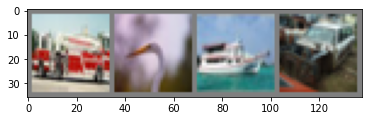

truck bird  ship  car  


In [3]:
def imshow(img):
    img = img / 2 + 0.5     
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


dataiter = iter(trainloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [4]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [5]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [6]:
for epoch in range(2):  

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:    
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.181
[1,  4000] loss: 1.859
[1,  6000] loss: 1.670
[1,  8000] loss: 1.572
[1, 10000] loss: 1.516
[1, 12000] loss: 1.474
[2,  2000] loss: 1.405
[2,  4000] loss: 1.387
[2,  6000] loss: 1.363
[2,  8000] loss: 1.328
[2, 10000] loss: 1.322
[2, 12000] loss: 1.309
Finished Training


In [7]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 53 %
